# House Prices Kaggle Competition

This notebook simply explores the dataset to see what insights can be gained.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Import and inspect the data

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
featuresWithNullValues = df.isnull().sum()
print(featuresWithNullValues[featuresWithNullValues > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# Training Data Cleanup

The **train.csv** dataset has 1460 records and 81 features. There are 19 features with missing data that need to be treated with a variety of strategies. Ranked in order of most missing data to least:
- PoolQC = 99.52%
- MiscFeature = 96.30%
- Alley = 93.76%
- Fence = 80.75%
- FireplaceQu = 47.26%
- LotFrontage = 17.74%
- GaragType, GarageYrBlt, GarageFinish, GarageQual, GarageCond = 5.55%
- BsmtExposure, BsmtFinType2 = 2.60%
- BsmtQual, BsmtCond, BsmtFinType1 = 2.53%
- MasVnrType, MasVnrArea = 0.55%
- Electrical = 0.07%

### PoolQC (99.52%)

PoolQC (Pool quality) is related to PoolArea which is not missing data and has a lot of 0's, which likely means there is no pool. Let's see if missing PoolQC values are correlated to PoolArea values that are 0.

In [5]:
df.PoolArea.value_counts().head(3)

0      1453
512       1
648       1
Name: PoolArea, dtype: int64

There are 1453 PoolArea values equal to 0 which matches the number of missing PoolQC values. Are they 100% correlated?

In [6]:
len(df[(df.PoolArea==0) & df.PoolQC.isnull()])

1453

Yes they are. The data description allows for 'NA' as an option. **Let's replace nan with NA.**

In [7]:
df.PoolQC.fillna('NA', inplace=True)

### MiscFeatures (96.30%)

Miscellaneous feature not covered in other categories. There is a MiscVal feature that is not missing data. I am guessing everywhere there is missing data for MiscFeature there will be a $0 value for MiscVal.

In [8]:
df.MiscVal.value_counts().head(3)

0      1408
400      11
500       8
Name: MiscVal, dtype: int64

In [9]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

There are 2 more 0 value features than missing misc features. Is this because 'Othr' miscellaneous feature is 0 value?

In [10]:
temp_df = df[['MiscFeature', 'MiscVal']]

shed_df = temp_df[temp_df['MiscFeature'] == 'Shed'] 
gar2_df = temp_df[temp_df['MiscFeature'] == 'Gar2'] 
othr_df = temp_df[temp_df['MiscFeature'] == 'Othr'] 
tenc_df = temp_df[temp_df['MiscFeature'] == 'TenC'] 

othr_df.head()

,MiscFeature,MiscVal
705,Othr,3500
873,Othr,0


No, one of the sheds (index 1200) is 0 as well.

I'm not going to worry about the additional 2. If MiscFeature is nan **I will set to 'NA'** as defined in the data description.

In [11]:
df.MiscFeature.fillna('NA', inplace=True)

### Alley (93.76%)

Type of alley access to property

- Grvl	Gravel
- Pave	Paved
- NA 	No alley access

Some possibly related features:

- Utilities: Type of utilities available - limited utilities access might imply no alley access.
- BldgType: Type of dwelling - townhouses likely have no alley access.

In [12]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

That wasn't helpful, what about BldgType?

In [13]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Nothing there either. How about the Neighborhood?

In [14]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [15]:
#len(df[(df.PoolArea==0) & df.PoolQC.isnull()])
temp_df = df[df['Alley'].notnull()] 
temp_df.Neighborhood.value_counts()

OldTown    43
Somerst    24
IDOTRR      7
Edwards     6
BrkSide     5
SWISU       4
Crawfor     1
NAmes       1
Name: Neighborhood, dtype: int64

I don't see any relationships that can help impute the missing values. Given almost 94% of the data is missing, **I will just drop this feature.**

In [16]:
df.drop('Alley', axis=1, inplace=True)

### Fence (80.75%)

Fence quality
		
- GdPrv	Good Privacy
- MnPrv	Minimum Privacy
- GdWo	Good Wood
- MnWw	Minimum Wood/Wire
- NA	No Fence

In [17]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

There are too many missing values and no other feature gives a clue about this one. **So just drop it.**

In [18]:
df.drop('Fence', axis=1, inplace=True)

### FireplaceQu (47.26%)

Fireplace quality

- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace

Fireplaces: Number of fireplaces

In [19]:
df.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

There are 690 homes with 0 fireplaces. This matches the number of missing FireplaceQu values.

In [20]:
len(df[(df.Fireplaces==0) & df.FireplaceQu.isnull()])

690

All I need to do is **fill nan's with 'NA'.**

In [21]:
df.FireplaceQu.fillna('NA', inplace=True)

### LotFrontage (17.74%)

Linear feet of street connected to property.

Some related: 
- LotConfig: Lot configuration

In [22]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

There are too many missing values and no other feature gives a clue about this one. **So just drop it.**

In [23]:
df.drop('LotFrontage', axis=1, inplace=True)

### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond (5.55%)

In [24]:
temp_df = df[['GarageCars', 'GarageArea', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]
temp_df[temp_df['GarageType'].isnull()]

,GarageCars,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,0,0,NaN,NaN,NaN,NaN,NaN
48,0,0,NaN,NaN,NaN,NaN,NaN
78,0,0,NaN,NaN,NaN,NaN,NaN
88,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1349,0,0,NaN,NaN,NaN,NaN,NaN
1407,0,0,NaN,NaN,NaN,NaN,NaN
1449,0,0,NaN,NaN,NaN,NaN,NaN
1450,0,0,NaN,NaN,NaN,NaN,NaN


In [25]:
temp_df.GarageCars.value_counts().head(10)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

There are 81 records for GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond. And there appears to be 81 correlated records for GarageCars and GarageArea with a value of 0.

**fill GarageYrBlt with 0 and all others with 'NA'**

In [26]:
df.GarageType.fillna('NA', inplace=True)
df.GarageYrBlt.fillna(0, inplace=True)
df.GarageFinish.fillna('NA', inplace=True)
df.GarageQual.fillna('NA', inplace=True)
df.GarageCond.fillna('NA', inplace=True)

### BsmtQual, BsmtCond, BsmtFinType1 (2.53%) - BsmtExposure, BsmtFinType2 (2.60%)

- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtFinType1: Rating of basement finished area
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType2: Rating of basement finished area (if multiple types)

TotalBsmtSF is not missing any values, could that be a predictor for the missing values above?

In [27]:
df.TotalBsmtSF.value_counts().head(3)
#df.TotalBsmtSF.value_counts().sum()

0      37
864    35
672    17
Name: TotalBsmtSF, dtype: int64

There are 37 values with 0 sf which matches number of missing values for BsmtQual, BsmtCond, BsmtFinType1. Are they 100% correlated?

In [28]:
len(df[(df.TotalBsmtSF==0) & df.BsmtQual.isnull() & df.BsmtCond.isnull() & df.BsmtFinType1.isnull()])

37

Yes they are. I can **set these missing values to 'NA'**

In [29]:
df.BsmtQual.fillna('NA', inplace=True)
df.BsmtCond.fillna('NA', inplace=True)
df.BsmtFinType1.fillna('NA', inplace=True)

How many missing values for BsmtExposure and BsmtFinType2?

In [30]:
1460 - df.BsmtExposure.value_counts().sum()
1460 - df.BsmtFinType2.value_counts().sum()

38

Is there correlation for sf?

In [31]:
len(df[(df.TotalBsmtSF==0) & df.BsmtExposure.isnull() & df.BsmtFinType2.isnull()])

37

Yes there is. **Set these to 'NA'.**

In [32]:
for i in df.index:
    if(df.at[i, 'TotalBsmtSF']==0):
        df.at[i, 'BsmtExposure'] = 'NA'
        df.at[i, 'BsmtFinType2'] = 'NA'

There is still one more record missing values BsmtExposure and BsmtFinType2. Are they correlated?

In [33]:
temp_df = df[['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtExposure', 'BsmtFinType2']]

temp_df[temp_df.BsmtExposure.isnull() | temp_df.BsmtFinType2.isnull()]

,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,BsmtExposure,BsmtFinType2
332,3206,1603,1124,479,No,NaN
948,936,936,0,0,NaN,Unf


No, lets look at value counts for each and choose the most frequent option.

In [34]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     37
Name: BsmtExposure, dtype: int64

In [35]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

**Set the missing values**

In [36]:
index = df.index[df.BsmtExposure.isnull()]
df.at[index[0], 'BsmtExposure'] = 'No'

In [37]:
index = df.index[df.BsmtFinType2.isnull()]
df.at[index[0], 'BsmtFinType2'] = 'Unf'

### MasVnrType, MasVnrArea (0.55%)

Are all the same records missing these or are missing values spread around?

In [38]:
len(df[df.MasVnrType.isnull() & df.MasVnrArea.isnull()])

8

All 8 missing values overlap. Exterior1st and Exterior2nd tell us what veneer type to assign to null values. Will have to take average area.

In [39]:
df.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

An example of the Exterior1st and Exterior2nd values when veneer type and area are null.

In [40]:
temp_df = df[['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea']]

temp_df[temp_df.MasVnrArea.isnull() & temp_df.MasVnrType.isnull()]

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea
234,VinylSd,VinylSd,NaN,NaN
529,Wd Sdng,Stone,NaN,NaN
650,CemntBd,CmentBd,NaN,NaN
936,VinylSd,VinylSd,NaN,NaN
973,CemntBd,CmentBd,NaN,NaN
977,VinylSd,VinylSd,NaN,NaN
1243,VinylSd,VinylSd,NaN,NaN
1278,VinylSd,VinylSd,NaN,NaN


A conditional test can be used.

In [41]:
# calculate mean of all MasVnrArea values that are greater than 0.
# for each house in data frame:
#     if Exterior1st or Exterior2nd = Brick Common, then:
#         MasVnrType = BrkCmn
#         MasVnrArea = (mean)
#     else if Exterior1st or Exterior2nd = Brick Face, then:
#         MasVnrType = BrkFace
#         MasVnrArea = (mean)
#     else if Exterior1st or Exterior2nd = Cinder Block, then:
#         MasVnrType = CBlock
#         MasVnrArea = (mean)
#     else if Exterior1st or Exterior2nd = Stone, then:
#         MasVnrType = Stone
#         MasVnrArea = (mean)
#     else:
#         MasVnrType = None
#         MasVnrArea = 0.0

In [42]:
temp_df = df[(df['MasVnrArea'] > 0.0)]
area_mean = temp_df.MasVnrArea.mean()
area_mean

254.7394247038917

**Fill in missing values**

In [43]:
for i in df.index:
    value = df.at[i, 'MasVnrType']
    if(pd.isnull(value)):
        if((df.at[i, 'Exterior1st'] == 'Brick Common') or (df.at[i, 'Exterior2nd'] == 'Brick Common')):
            print('Found Brick Common')
            df.at[i, 'MasVnrType'] = 'BrkCmn'
            df.at[i, 'MasVnrArea'] = area_mean
        elif((df.at[i, 'Exterior1st'] == 'Brick Face') or (df.at[i, 'Exterior2nd'] == 'Brick Face')):
            print('Found Brick Face')
            df.at[i, 'MasVnrType'] = 'BrkFace'
            df.at[i, 'MasVnrArea'] = area_mean
        elif((df.at[i, 'Exterior1st'] == 'Cinder Block') or (df.at[i, 'Exterior2nd'] == 'Cinder Block')):
            print('Found Cinder Block')
            df.at[i, 'MasVnrType'] = 'CBlock'
            df.at[i, 'MasVnrArea'] = area_mean
        elif((df.at[i, 'Exterior1st'] == 'Stone') or (df.at[i, 'Exterior2nd'] == 'Stone')):
            print('Found Stone')
            df.at[i, 'MasVnrType'] = 'Stone'
            df.at[i, 'MasVnrArea'] = area_mean
        else:
            print('Found one of the others')
            df.at[i, 'MasVnrType'] = 'None'
            df.at[i, 'MasVnrArea'] = 0.0
    

Found one of the others
Found Stone
Found one of the others
Found one of the others
Found one of the others
Found one of the others
Found one of the others
Found one of the others


Verify that there are no longer any nan values for veneer area and type

In [44]:
temp_df = df[['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea']]

temp_df[temp_df.MasVnrArea.isnull() & temp_df.MasVnrType.isnull()]

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea


### Electrical (0.07%)




In [45]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

There is only one missing value and 91.37% of values are SBrkr, so just **set any missing values to SBrkr.**

In [46]:
df.Electrical.fillna('SBrkr', inplace=True)

### Let's see how we are doing.

In [47]:
featuresWithNullValues = df.isnull().sum()
print(featuresWithNullValues[featuresWithNullValues > 0])

Series([], dtype: int64)


Now I need to convert the catgorical features to numerical

### First, convert non-numeric objects to integers.

Start by creating dictionaries to encode numbers for each value. As I did this I encountered the following features that were dominated by a single value and provide no useful information. They are dropped from the dataset.

- Street: Pave = 99.6%
- Utilities: AllPub = 99.9%

In [48]:
df.drop('Street', axis=1, inplace=True)
df.drop('Utilities', axis=1, inplace=True)

In [49]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [50]:
MSZoning_map = {'MSZoning': {'A':1, 'C (all)':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8}}
LotShape_map = {'LotShape': {'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}}
LandContour_map = {'LandContour': {'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4}}
LotConfig_map = {'LotConfig': {'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5}}
LandSlope_map = {'LandSlope': {'Gtl':1, 'Mod':2, 'Sev':3}}
Neighborhood_map = {'Neighborhood': {'NAmes':1, 'CollgCr':2, 'OldTown':3, 'Edwards':4, 'Somerst':5,\
                                     'Gilbert':6, 'NridgHt':7, 'Sawyer':8, 'NWAmes':9, 'SawyerW':10,\
                                     'BrkSide':11, 'Crawfor':12, 'Mitchel':13, 'NoRidge':14, 'Timber':15,\
                                     'IDOTRR':16, 'ClearCr':17, 'StoneBr':18, 'SWISU':19, 'MeadowV':20,\
                                     'Blmngtn':21, 'BrDale':22, 'Veenker':23, 'NPkVill':24, 'Blueste':25}}
Condition1_map = {'Condition1': {'Norm':1, 'Feedr':2, 'Artery':3, 'RRAn':4, 'PosN':5, 'RRAe':6, 'PosA':7,\
                                 'RRNn':8, 'RRNe':9}}
Condition2_map = {'Condition2': {'Norm':1, 'Feedr':2, 'Artery':3, 'RRAn':4, 'PosN':5, 'RRAe':6, 'PosA':7,\
                                 'RRNn':8, 'RRNe':9}}
BldgType_map = {'BldgType': {'1Fam':1, 'TwnhsE':2, 'Duplex':3, 'Twnhs':4, '2fmCon':5}}
HouseStyle_map = {'HouseStyle': {'1Story':1, '2Story':2, '1.5Fin':3, 'SLvl':4, 'SFoyer':5, '1.5Unf':6,\
                                 '2.5Unf':7, '2.5Fin':8}}
RoofStyle_map = {'RoofStyle': {'Gable':1, 'Hip':2, 'Flat':3, 'Gambrel':4, 'Mansard':5, 'Shed':6}}
RoofMatl_map = {'RoofMatl': {'CompShg':1, 'Tar&Grv':2, 'WdShngl':3, 'WdShake':4, 'Metal':5, 'Membran':6,\
                             'Roll':7, 'ClyTile':8}}
Exterior1st_map = {'Exterior1st': {'VinylSd':1, 'MetalSd':2, 'HdBoard':3, 'Wd Sdng':4, 'Plywood':5, 'CemntBd':6,\
                                   'WdShing':7, 'Stucco':8, 'BrkFace':9, 'AsbShng':10, 'ImStucc':11, 'BrkComm':12,\
                                   'Stone':13, 'AsphShn':14, 'Other':15, 'CBlock':16, 'PreCast':17}}
Exterior2nd_map = {'Exterior2nd': {'VinylSd':1, 'MetalSd':2, 'HdBoard':3, 'Wd Sdng':4, 'Plywood':5, 'CmentBd':6,\
                                   'Wd Shng':7, 'Stucco':8, 'BrkFace':9, 'AsbShng':10, 'ImStucc':11, 'Brk Cmn':12,\
                                   'Stone':13, 'AsphShn':14, 'Other':15, 'CBlock':16, 'PreCast':17}}
MasVnrType_map = {'MasVnrType': {'None':1, 'BrkFace':2, 'Stone':3, 'BrkCmn':4, 'CBlock':5}}
ExterQual_map = {'ExterQual': {'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':5}}
ExterCond_map = {'ExterCond': {'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':5}}
Foundation_map = {'Foundation': {'PConc':1, 'CBlock':2, 'BrkTil':3, 'Slab':4, 'Stone':5, 'Wood':6}}
BsmtQual_map = {'BsmtQual': {'TA':1, 'Gd':2, 'Ex':3, 'NA':4, 'Fa':5, 'Po':6}}
BsmtCond_map = {'BsmtCond': {'TA':1, 'Gd':2, 'Ex':3, 'NA':4, 'Fa':5, 'Po':6}}
BsmtExposure_map = {'BsmtExposure': {'No':1, 'Av':2, 'Gd':3, 'Mn':4, 'NA':5}}
BsmtFinType1_map = {'BsmtFinType1': {'Unf':1, 'GLQ':2, 'ALQ':3, 'BLQ':4, 'Rec':5, 'LwQ':6, 'NA':7}}
BsmtFinType2_map = {'BsmtFinType2': {'Unf':1, 'GLQ':2, 'ALQ':3, 'BLQ':4, 'Rec':5, 'LwQ':6, 'NA':7}}
Heating_map = {'Heating': {'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6}}
HeatingQC_map = {'HeatingQC': {'Ex':1, 'TA':2, 'Gd':3, 'Fa':4, 'Po':5}}
CentralAir_map = {'CentralAir': {'Y':1, 'N':2}}
Electrical_map = {'Electrical': {'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5}}
KitchenQual_map = {'KitchenQual': {'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':5}}
Functional_map = {'Functional': {'Typ':1, 'Min2':2, 'Min1':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8}}
FireplaceQu_map = {'FireplaceQu': {'NA':1, 'Gd':2, 'TA':3, 'Fa':4, 'Ex':5, 'Po':6}}
GarageType_map = {'GarageType': {'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'NA':4, 'Basment':5, 'CarPort':6, '2Types':7}}
GarageFinish_map = {'GarageFinish': {'Unf':1, 'RFn':2, 'Fin':3, 'NA':4}}
GarageQual_map = {'GarageQual': {'Ex':1, 'TA':2, 'Gd':3, 'Fa':4, 'Po':5, 'NA':6}}
GarageCond_map = {'GarageCond': {'Ex':1, 'TA':2, 'Gd':3, 'Fa':4, 'Po':5, 'NA':6}}
PavedDrive_map = {'PavedDrive': {'Y':1, 'N':2, 'P':3}}
PoolQC_map = {'PoolQC': {'Ex':1, 'TA':2, 'Gd':3, 'Fa':4, 'NA':5}}
MiscFeature_map = {'MiscFeature': {'NA':1, 'Shed':2, 'Gar2':3, 'Othr':4, 'TenC':5, 'Elev':6}}
SaleType_map = {'SaleType': {'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'ConLw':6, 'CWD':7, 'Oth':8,
                             'Con':9, 'VWD':10}}
SaleCondition_map = {'SaleCondition': {'Normal':1, 'Partial':2, 'Abnorml':3, 'Family':4, 'Alloca':5, 'AdjLand':6}}

Now replace the categorical values with the numerical values in the dictionaries above.

In [51]:
df.replace(MSZoning_map, inplace=True)
df.replace(LotShape_map, inplace=True)
df.replace(LandContour_map, inplace=True)
df.replace(LotConfig_map, inplace=True)
df.replace(LandSlope_map, inplace=True)
df.replace(Neighborhood_map, inplace=True)
df.replace(Condition1_map, inplace=True)
df.replace(Condition2_map, inplace=True)
df.replace(BldgType_map, inplace=True)
df.replace(HouseStyle_map, inplace=True)
df.replace(RoofStyle_map, inplace=True)
df.replace(RoofMatl_map, inplace=True)
df.replace(Exterior1st_map, inplace=True)
df.replace(Exterior2nd_map, inplace=True)
df.replace(MasVnrType_map, inplace=True)
df.replace(ExterQual_map, inplace=True)
df.replace(ExterCond_map, inplace=True)
df.replace(Foundation_map, inplace=True)
df.replace(BsmtQual_map, inplace=True)
df.replace(BsmtCond_map, inplace=True)
df.replace(BsmtExposure_map, inplace=True)
df.replace(BsmtFinType1_map, inplace=True)
df.replace(BsmtFinType2_map, inplace=True)
df.replace(Heating_map, inplace=True)
df.replace(HeatingQC_map, inplace=True)
df.replace(CentralAir_map, inplace=True)
df.replace(Electrical_map, inplace=True)
df.replace(KitchenQual_map, inplace=True)
df.replace(Functional_map, inplace=True)
df.replace(FireplaceQu_map, inplace=True)
df.replace(GarageType_map, inplace=True)
df.replace(GarageFinish_map, inplace=True)
df.replace(GarageQual_map, inplace=True)
df.replace(GarageCond_map, inplace=True)
df.replace(PavedDrive_map, inplace=True)
df.replace(PoolQC_map, inplace=True)
df.replace(MiscFeature_map, inplace=True)
df.replace(SaleType_map, inplace=True)
df.replace(SaleCondition_map, inplace=True)

Lets see where we are at

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   LandSlope      1460 non-null   int64  
 8   Neighborhood   1460 non-null   int64  
 9   Condition1     1460 non-null   int64  
 10  Condition2     1460 non-null   int64  
 11  BldgType       1460 non-null   int64  
 12  HouseStyle     1460 non-null   int64  
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int64  
 18  RoofMatl

# Feature Selection

In many situations using all the features available in a data set will not result in the most predictive model. Depending on the type of model being used, the size of the data set and various other factors, including excess features, can reduce model performance. 

There are three main goals to feature selection.

- Improve the accuracy with which the model is able to predict for new data
- Reduce computational cost
- Produce a more interpretable model

The Housing Prices dataset has 77 features after the cleanup. Lets see if we can drop any.

<AxesSubplot:>

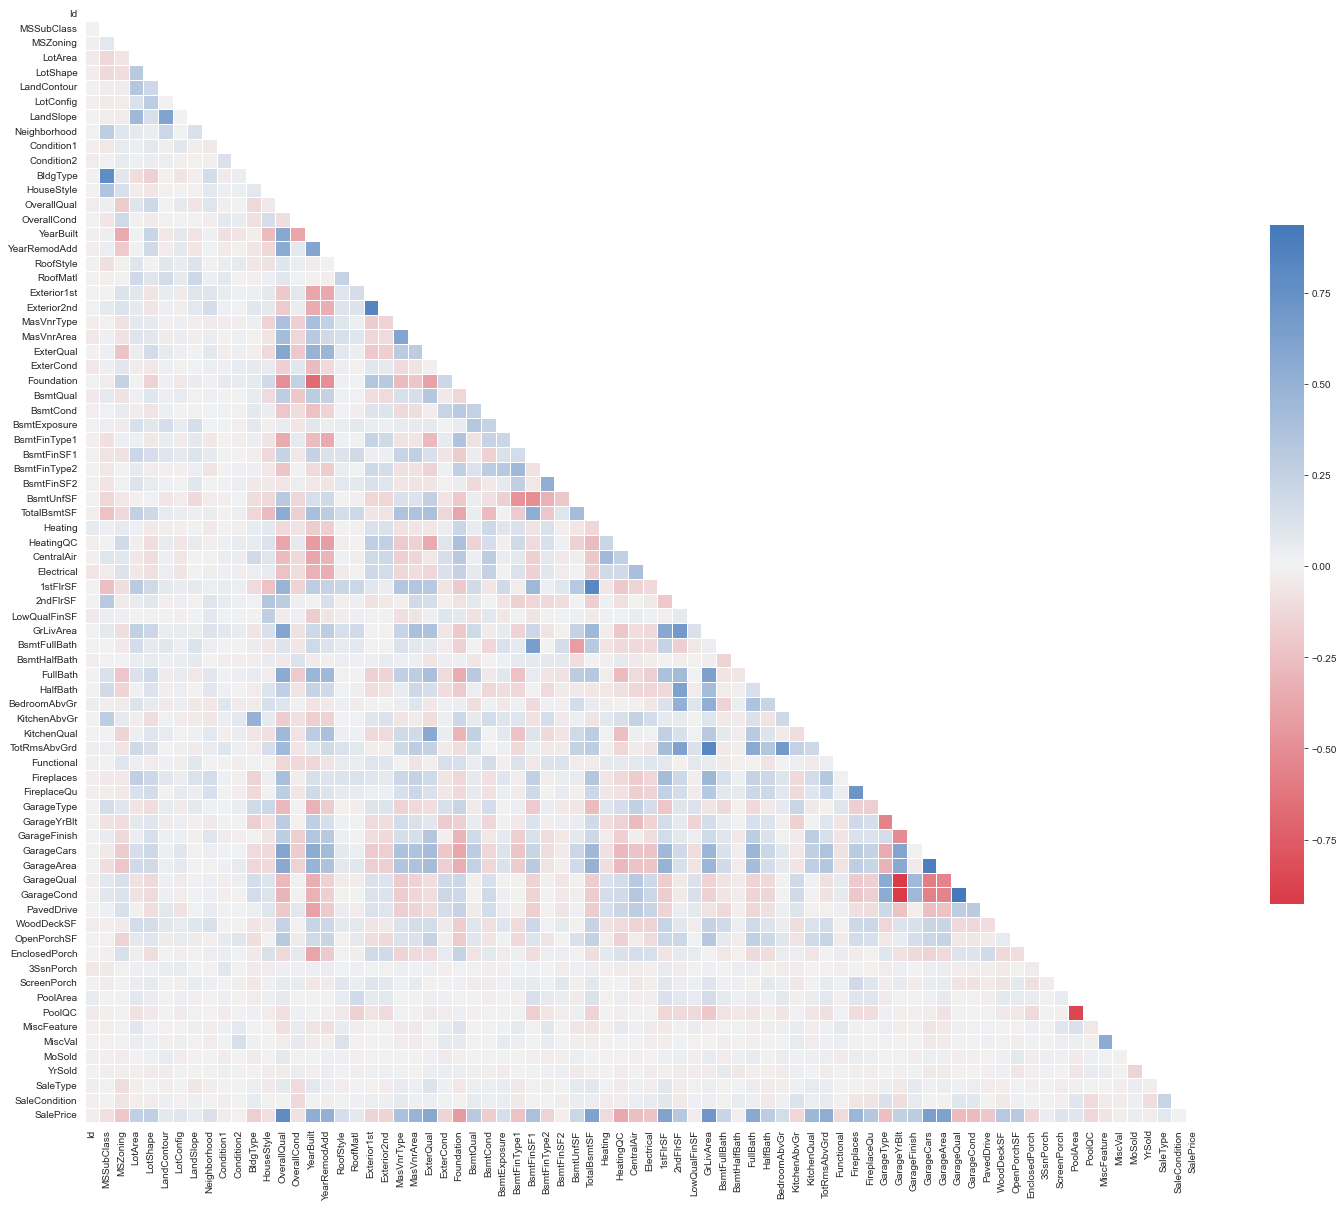

In [60]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)